# Start

In [1]:
import ROOT
import ROOT.RooFit as rf
import rootnotes
import numpy as np
import matplotlib.pyplot as plt
from root_numpy import array2tree, hist2array
%matplotlib inline

Welcome to JupyROOT 6.08/02


In [2]:
from ROOT import gInterpreter, gSystem

In [3]:
gInterpreter.ProcessLine('#include "../56_Hbbyy/inc/HggTwoSidedCBPdf.h"')

0L

In [4]:
gSystem.Load('../56_Hbbyy/libDH.so')
# gSystem.Load('libDH.so')

0

In [5]:
c1=rootnotes.default_canvas()

In [6]:
branches = [
    'HGamEventInfoAuxDyn.yybb_bTagCat',
    'HGamEventInfoAuxDyn.m_yy',
    'HGamEventInfoAuxDyn.isPassed'
]

In [7]:
import pandautils as pup

In [6]:
# sm di-higgs (signal)
df = pup.root2panda('mc15c.MGPy8_sm_hh_yybb.MxAODDetailed.p2669.h015.root', 'CollectionTree', branches=branches)

In [7]:
# sm single higgs

In [8]:
# sherpa bkg + templated bkg

In [9]:
tree0 = array2tree(
    np.array(df["HGamEventInfoAuxDyn.m_yy"][
            np.logical_and(df["HGamEventInfoAuxDyn.isPassed"] == 1, df["HGamEventInfoAuxDyn.yybb_bTagCat"] == 0)
        ], dtype=[('m_yy', np.float64)])
)
tree1 = array2tree(
    np.array(df["HGamEventInfoAuxDyn.m_yy"][
            np.logical_and(df["HGamEventInfoAuxDyn.isPassed"] == 1, df["HGamEventInfoAuxDyn.yybb_bTagCat"] == 1)
        ], dtype=[('m_yy', np.float64)])
)
tree2 = array2tree(
    np.array(df["HGamEventInfoAuxDyn.m_yy"][
            np.logical_and(df["HGamEventInfoAuxDyn.isPassed"] == 1, df["HGamEventInfoAuxDyn.yybb_bTagCat"] == 2)
        ], dtype=[('m_yy', np.float64)])
)

In [10]:
# -- create a symbolic variable m_yy with a name and range
m_yy = ROOT.RooRealVar("m_yy", "m_yy", 105000, 150000)

# -- convert from TTree to RooDataSet
dataset0 = ROOT.RooDataSet("dataset0", "0tag dataset from tree", tree0, ROOT.RooArgSet(m_yy))
dataset1 = ROOT.RooDataSet("dataset1", "1tag dataset from tree", tree1, ROOT.RooArgSet(m_yy))
dataset2 = ROOT.RooDataSet("dataset2", "2tag dataset from tree", tree2, ROOT.RooArgSet(m_yy))

[#1] INFO:Eval -- RooTreeDataStore::loadValues(dataset0) Ignored 1 out of range events
[#1] INFO:Eval -- RooTreeDataStore::loadValues(dataset1) Ignored 1 out of range events


In [11]:
# m0_cb = ROOT.RooRealVar('m0_cb','m0_cb', 105000, 150000)
# sigma_cb = ROOT.RooRealVar('sigma_cb','sigma_cb', 0, 2000)
# alpha_cb = ROOT.RooRealVar('alpha_cb','alpha_cb', 0, 150000)
# n_cb = ROOT.RooRealVar('n_cb','n_cb', 0, 100)

# # -- crystal ball
# s = ROOT.RooCBShape(
#     'cb', 'Crystal Ball',
#     m_yy,
#     m0_cb,
#     sigma_cb,
#     alpha_cb,
#     n_cb
# )

In [24]:
from ROOT import HggTwoSidedCBPdf

In [16]:
m0_cb = ROOT.RooRealVar('m0_cb','m0_cb', 105000, 150000)
sigma_cb = ROOT.RooRealVar('sigma_cb','sigma_cb', 0, 2000)
alphaLo_cb = ROOT.RooRealVar('alphaLo_cb','alphaLo_cb', 0, 150000)
nLo_cb = ROOT.RooRealVar('nLo_cb','nLo_cb', 0, 100)
alphaHi_cb = ROOT.RooRealVar('alphaHi_cb','alphaHi_cb', 0, 150000)
nHi_cb = ROOT.RooRealVar('nHi_cb','nHi_cb', 0, 100)

# -- double sided crystal ball
s = HggTwoSidedCBPdf(
    'dscb', 'Double Sided Crystal Ball',
    m_yy,
    m0_cb,
    sigma_cb,
    alphaLo_cb,
    nLo_cb,
    alphaHi_cb,
    nHi_cb
)

In [17]:
r0 = s.fitTo(dataset0, ROOT.RooFit.Save())
#r1 = s.fitTo(dataset1, ROOT.RooFit.Save())
#r2 = s.fitTo(dataset2, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaHi_cb   7.50000e+04  1.50000e+04    0.00000e+00  1.50000e+05
     2 alphaLo_cb   7.50000e+04  1.50000e+04    0.00000e+00  1.50000e+05
     3 m0_cb        1.27500e+05  4.50000e+03    1.05000e+05  1.50000e+05
     4 nHi_cb       5.00000e+01  1.00000e+01    0.00000e+00  1.00000e+02
     5 nLo_cb       5.00000e+01  1.00000e+01    0.00000e+00  1.00000e+02
     6 sigma_cb     1.00000e+03  2.00000e+02    0.00000e+00  2.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        3000           1
 *********

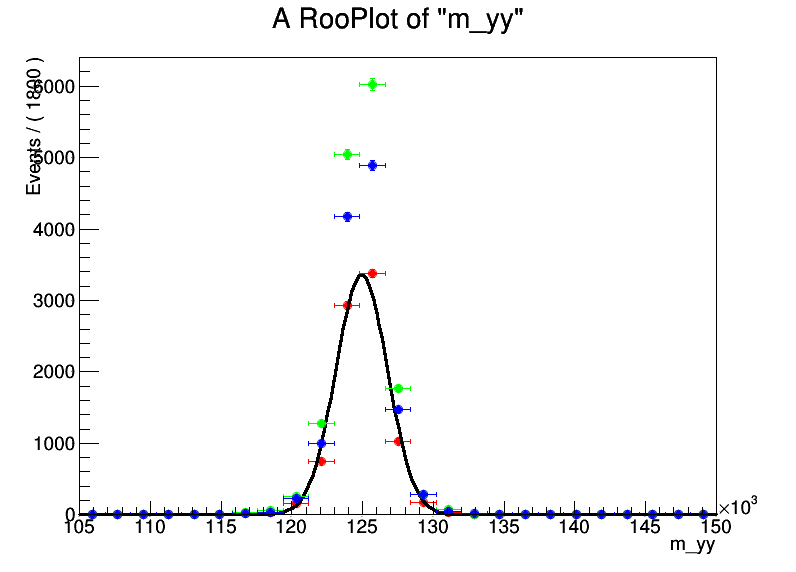

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 14833 will supercede previous event count of 8511 for normalization of PDF projections
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 12159 will supercede previous event count of 14833 for normalization of PDF projections


INFO:ROOT.TCanvas.Print] png file /var/folders/0d/3d7wlbr14zn3_l2ctx0r1jdw0000gn/T/tmpu_AsCu.png has been created


In [18]:
frame = m_yy.frame()

dataset0.plotOn(frame, ROOT.RooFit.Binning(25), rf.MarkerColor(ROOT.kRed), rf.LineColor(ROOT.kRed))
# BE CAREFUL! s NEEDS TO BE PLOTTED RIGHT AFTER ITS DATASET, OTHERWISE NORMALIZATION IS OFF!
s.plotOn(frame, rf.LineColor(ROOT.kBlack))

dataset1.plotOn(frame, ROOT.RooFit.Binning(25), rf.MarkerColor(ROOT.kGreen), rf.LineColor(ROOT.kGreen))
dataset2.plotOn(frame, ROOT.RooFit.Binning(25), rf.MarkerColor(ROOT.kBlue), rf.LineColor(ROOT.kBlue))
frame.Draw()
c1

In [35]:
# -- how to define your own pdf by hand
# x = ROOT.RooRealVar('x','x',-10,10)
# y = ROOT.RooRealVar('y','y',0,5)
# a = ROOT.RooRealVar('a','a',3.0)
# b = ROOT.RooRealVar('b','b',-2.0)
# gp = ROOT.RooGenericPdf('gp','Generic PDF','exp(x*y+a)-b*x', ROOT.RooArgList(x,y,a,b)) 

In [19]:
sigma_cb.getVal()

1800.2314555518092

In [31]:
r0.Print()


  RooFitResult: minimized FCN value: 75977.1, estimated distance to minimum: 4.05796e-05
                covariance matrix quality: Approximation only, not accurate
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
            alphaHi_cb    3.9043e+04 +/-  3.60e+04
            alphaLo_cb    7.5000e+04 +/-  6.31e+04
                 m0_cb    1.2494e+05 +/-  1.98e+01
                nHi_cb    5.0000e+01 +/-  4.21e+01
                nLo_cb    5.0000e+01 +/-  4.21e+01
              sigma_cb    1.8226e+03 +/-  1.40e+01



# RooDataSet 2 numpy array

In [42]:
def wrap_iter(it):
    elem = it.Next()
    while elem:
        yield elem
        elem = it.Next()

In [43]:
def get_data(data): # seems to be working fine but it's one element short??
    curr = data.get(0)
    ret = np.zeros((curr.getSize(), data.numEntries()))
    vars = []
    for v in wrap_iter(curr.iterator()):
        vars.append(v)
    idx = 0
    while curr:
        for i, v in enumerate(vars):
            var = curr.find(v)
            try:
                ret[i, idx] = var.getVal()
            except AttributeError:
                ret[i, idx] = var.getIndex()
        idx += 1
        curr = data.get(idx)
    return ret

In [44]:
get_data(dataset1).T

array([[ 124487.7265625],
       [ 126503.0078125],
       [ 124170.984375 ],
       ..., 
       [ 124511.9140625],
       [ 123265.53125  ],
       [ 121814.3125   ]])

In [45]:
# -- just to check:
np.array(df["HGamEventInfoAuxDyn.m_yy"][
            np.logical_and(df["HGamEventInfoAuxDyn.isPassed"] == 1, df["HGamEventInfoAuxDyn.yybb_bTagCat"] == 1)
        ], dtype=[('m_yy', np.float64)])

array([(124487.7265625,), (126503.0078125,), (124170.984375,), ...,
       (124511.9140625,), (123265.53125,), (121814.3125,)], 
      dtype=[('m_yy', '<f8')])

# Extract curve from frame

In [6]:
xaxis = np.linspace(105000, 160000, 100) # xaxis range and number of interpolation points

In [27]:
curves = {}
for idx in range(int(frame.numItems())):
    obj = frame.getObject(idx)
    print obj
    if type(obj) == ROOT.RooCurve:
        curves[obj.GetName()] = [obj.interpolate(point) for point in xaxis]

0
<ROOT.RooHist object ("h_dataset0") at 0x7fbaf15f3510>
1
<ROOT.RooCurve object ("dscb_Norm[m_yy]") at 0x7fbaf1756440>
2
<ROOT.RooHist object ("h_dataset1") at 0x7fbaf16b6180>
3
<ROOT.RooHist object ("h_dataset2") at 0x7fbaf283cc90>


# Load Histograms from ROOT File

In [6]:
from rootpy.io import root_open

In [7]:
bkg = root_open('combined_backgrounds_20170201.root')

In [8]:
histos_bkg = {k.GetName(): bkg.Get(k.GetName()) for k in bkg.GetListOfKeys()}

In [9]:
[k for k in histos_bkg.keys() if (('0tag' in k) and ('m_yy_' in k))]

['m_yy_lowMass_0tag_tightIsolated_bkg_single_Higgs',
 'm_yy_lowMass_0tag_tightIsolated_bkg_non_Higgs',
 'm_yy_highMass_0tag_tightIsolated_bkg_non_Higgs',
 'm_yy_highMass_0tag_tightIsolated_bkg_single_Higgs']

In [10]:
# Select one histogram to import into a datahist
h0_bkg_noH = histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_non_Higgs']
h0_bkg_1H = histos_bkg['m_yy_highMass_0tag_tightIsolated_bkg_single_Higgs']

# Declare observable x
myy = ROOT.RooRealVar("myy", "m_yy", h0_bkg_noH.GetXaxis().GetXmin(), h0_bkg_noH.GetXaxis().GetXmax())

# Create a binned dataset that imports contents of TH1 and associates its contents to observable 'x'
dh_bkg_noH = ROOT.RooDataHist("0tag_bkg_nonHiggs", "non Higgs bkg in 0tag category", ROOT.RooArgList(myy), h0_bkg_noH)
dh_bkg_1H = ROOT.RooDataHist("0tag_bkg_1Higgs", "single Higgs bkg in 0tag category", ROOT.RooArgList(myy), h0_bkg_1H)

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(0tag_bkg_nonHiggs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(0tag_bkg_1Higgs): fit range of variable myy expanded to nearest bin boundaries: [105,160] --> [105,160]


In [11]:
# -- define non-Higgs bkg fit function (Exponential pdf)
c0_bkg = ROOT.RooRealVar('c0_bkg', 'coefficient c0 of exponential bkg fit', -100, 100) #-2.63843e-2
exp_function = ROOT.RooExponential('bkg_fit', 'exponential bkg fit in 0 tag category', myy, c0_bkg)

In [12]:
# -- define single-Higgs bkg fit function (Double Sided Crystal Ball)
m0_cb = ROOT.RooRealVar('m0_cb','m0_cb', 125, 105, 160)
sigma_cb = ROOT.RooRealVar('sigma_cb','sigma_cb', 5, 0, 2000)
alphaLo_cb = ROOT.RooRealVar('alphaLo_cb','alphaLo_cb', 0, 5)
nLo_cb = ROOT.RooRealVar('nLo_cb','nLo_cb', 0, 10)
alphaHi_cb = ROOT.RooRealVar('alphaHi_cb','alphaHi_cb', 0, 5)
nHi_cb = ROOT.RooRealVar('nHi_cb','nHi_cb', 0, 10)
# alphaLo_cb = ROOT.RooRealVar('alphaLo_cb','alphaLo_cb', 2.16784)
# nLo_cb = ROOT.RooRealVar('nLo_cb','nLo_cb', 3.57625)
# alphaHi_cb = ROOT.RooRealVar('alphaHi_cb','alphaHi_cb', 2.32595)
# nHi_cb = ROOT.RooRealVar('nHi_cb','nHi_cb', 4.17267)

# -- double sided crystal ball
dscb_1h = ROOT.HggTwoSidedCBPdf(
    'dscb_1h', 'Double Sided Crystal Ball fit for single higgs bkg in 0tag category',
    myy,
    m0_cb,
    sigma_cb,
    alphaLo_cb,
    nLo_cb,
    alphaHi_cb,
    nHi_cb
)

In [13]:
# -- individual fit to bkg
exp_function.fitTo(dh_bkg_noH, rf.SumW2Error(ROOT.kTRUE))

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0_bkg       0.00000e+00  2.00000e+01   -1.00000e+02  1.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=4404.06 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIR

In [14]:
# -- individual fit to single higgs bkg
dscb_1h.fitTo(dh_bkg_1H, rf.SumW2Error(ROOT.kTRUE))

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alphaHi_cb   2.50000e+00  5.00000e-01    0.00000e+00  5.00000e+00
     2 alphaLo_cb   2.50000e+00  5.00000e-01    0.00000e+00  5.00000e+00
     3 m0_cb        1.25000e+02  5.50000e+00    1.05000e+02  1.60000e+02
     4 nHi_cb       5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     5 nLo_cb       5.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     6 sigma_cb     5.00000e+00  2.50000e+00    0.00000e+00  2.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        3000           1
 *********

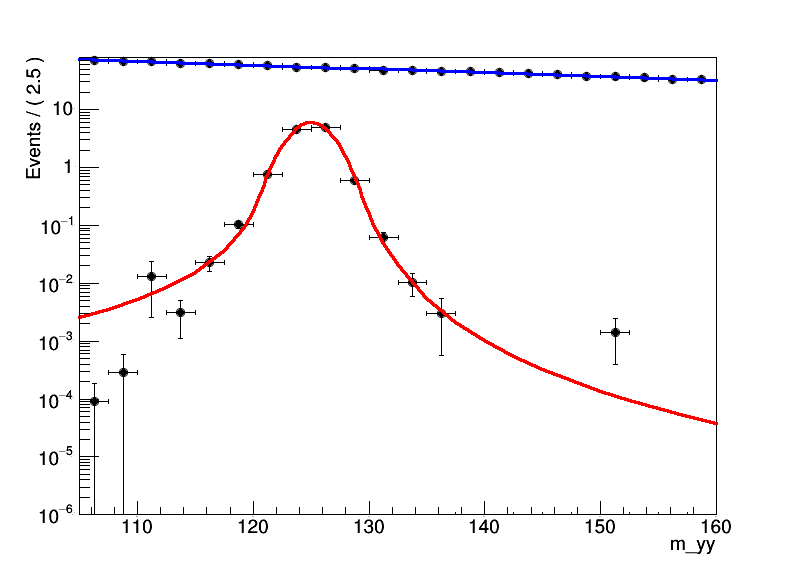

[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_bkg_1Higgs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 11.0631 will supercede previous event count of 1099 for normalization of PDF projections


INFO:ROOT.TCanvas.Print] png file /var/folders/0d/3d7wlbr14zn3_l2ctx0r1jdw0000gn/T/tmpI1evNn.png has been created


In [15]:
frame = myy.frame()
dh_bkg_noH.plotOn(frame)
exp_function.plotOn(frame)

dh_bkg_1H.plotOn(frame)
dscb_1h.plotOn(frame, rf.LineColor(ROOT.kRed))

frame.Draw()
frame.SetTitle("")
frame.SetMinimum(1e-6)
c1.SetLogy(True)
c1

In [16]:
# -- double sided crystal ball
# m0_cb = ROOT.RooRealVar('m0_cb','m0_cb', 125, 105, 160)
# sigma_cb = ROOT.RooRealVar('sigma_cb','sigma_cb', 5, 0, 2000)
alphaLo_cb_fixed = ROOT.RooRealVar('alphaLo_cb_fixed','alphaLo_cb_fixed', 2.37750)
nLo_cb_fixed = ROOT.RooRealVar('nLo_cb_fixed','nLo_cb_fixed', 2.05944)
alphaHi_cb_fixed = ROOT.RooRealVar('alphaHi_cb_fixed','alphaHi_cb_fixed', 2.44064)
nHi_cb_fixed = ROOT.RooRealVar('nHi_cb_fixed','nHi_cb_fixed', 3.55632)

dscb_1h_fixed = ROOT.HggTwoSidedCBPdf(
    'dscb_1h_fixed', 'Double Sided Crystal Ball fit for single higgs bkg in 0tag category',
    myy,
    m0_cb,
    sigma_cb,
    alphaLo_cb_fixed,
    nLo_cb_fixed,
    alphaHi_cb_fixed,
    nHi_cb_fixed
)

# -- define non-Higgs bkg fit function (Exponential pdf)
c0_bkg_fixed = ROOT.RooRealVar('c0_bkg_fixed', 'coefficient c0 of exponential bkg fit', -1.48644e-2)
exp_function_fixed = ROOT.RooExponential('bkg_fit_fixed', 'exponential bkg fit in 0 tag category', myy, c0_bkg_fixed)

In [17]:
#ROOT.RooAddPdf?

In [18]:
print dh_bkg_noH.sum(ROOT.kFALSE)
print dh_bkg_1H.sum(ROOT.kFALSE)

1099.0
11.0630627785


In an extended pdf, we provide the expected number of observed events of each kind. Underneath, this tacks on a Poisson term to the entire pdf which describes the probability of seeing that number of events of each kind. This is important because it allows the two independent pdfs to be normalized to something slightly off of the nominal value. Otherwise, if we provide a fraction f0, the second coefficient can only be (1-f0). This would then have to be scaled to exactly the number of observed events, without allowing the normalization to be slighly off of the expected one.

In [19]:
n_1h = ROOT.RooRealVar("n_1h", "expected number of 1 Higgs bkg events", 11)#, 0, 14069) 
n_noh = ROOT.RooRealVar("n_noh", "expected number of non Higgs bkg events", 1009, 0, 3000)

full_bkg = ROOT.RooAddPdf('full_bkg_pdf', 'Full Bkg PDF',
                    ROOT.RooArgList(exp_function_fixed, dscb_1h_fixed),
                    ROOT.RooArgList(n_noh, n_1h) # extended pdf!
)

In [20]:
from copy import deepcopy

combined_data = deepcopy(dh_bkg_noH)
combined_data.add(dh_bkg_1H)

In [21]:
full_bkg.fitTo(combined_data, rf.SumW2Error(ROOT.kTRUE))

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (bkg_fit_fixed)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (dscb_1h_fixed)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24984e+02  2.67375e-02    1.05000e+02  1.60000e+02
     2 n_noh        1.00900e+03  3.00000e+02    0.00000e+00  3.00000e+03
     3 sigma_cb     1.82728e+00  2.03890e-02    0.00000e+00  2.00000e+03
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 *****

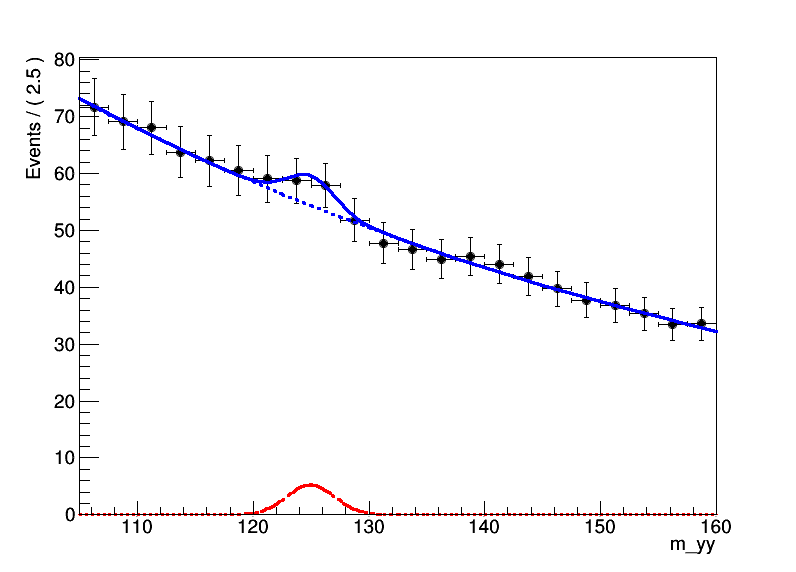

[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsPdf::plotOn(full_bkg_pdf) directly selected PDF components: (bkg_fit_fixed)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(full_bkg_pdf) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(full_bkg_pdf) directly selected PDF components: (dscb_1h_fixed)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(full_bkg_pdf) indirectly selected PDF components: ()


INFO:ROOT.TCanvas.Print] png file /var/folders/0d/3d7wlbr14zn3_l2ctx0r1jdw0000gn/T/tmpUSwPjy.png has been created


In [22]:
frame = myy.frame()
combined_data.plotOn(frame)
#dh_bkg_noH.plotOn(frame)
#exp_function.plotOn(frame)
#dh_bkg_1H.plotOn(frame)
#dscb_1h.plotOn(frame)

full_bkg.plotOn(frame)
full_bkg.plotOn(frame, ROOT.RooFit.Components('bkg_fit_fixed'), ROOT.RooFit.LineStyle(ROOT.kDashed))
full_bkg.plotOn(frame, ROOT.RooFit.Components('dscb_1h_fixed'), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))

frame.Draw()
frame.SetTitle("")
c1.SetLogy(False)
c1

# Insert Gaussian constraint on a variable in the model

Check out: https://root.cern.ch/root/html/tutorials/roofit/rf604_constraints.C.html

In [23]:
# -- introduce the nuisance parameter theta and its gaussian distribution
theta = ROOT.RooRealVar("theta", "nuisance param", -10, 10) # variable definition
theta_0 = ROOT.RooRealVar("theta_global", "global value of nuisance param", 0 ) # global observable, fixed value
theta_constraint = ROOT.RooGaussian("theta_constraint", "theta_constraint", theta, theta_0, rf.RooConst(1))

Theta affects the yield of the 1-Higgs background:
$$\text{PDF} = (n_{noH} * f_{\text{exp}} + n_{1H}(1 + 0.3*\theta) * f_{\text{DSCB}} + \mu * n_{2H} * f_{\text{DSCB}}) * Gauss(\theta; \theta_0, 1)$$
where $\theta_0$ is a global observable.

In [24]:
_product = ROOT.RooProduct("xxx", "xxx", ROOT.RooArgList(rf.RooConst(0.3), theta))

In [25]:
n_1h_coeff = ROOT.RooAddition(
    "n_1h_coeff", "n_1h_coeff", ROOT.RooArgList(
        rf.RooConst(1),
        _product
    )
)

In [26]:
n_1h_prod = ROOT.RooProduct(
    "n_1h_prod", "n_1h_prod", ROOT.RooArgList(n_1h, n_1h_coeff)
)

In [27]:
mu_2h_signal_strength = ROOT.RooRealVar("mu_2h_signal_strength", "double higgs signal strength", 1, 0, 5) # is the range ok?
n_2h = ROOT.RooRealVar("n_2h", "expected number of 2 Higgs signal events", 1) # get this from the cutflow
n_2h_times_mu = ROOT.RooProduct(
        "n_2h_times_mu", "n_2h * mu_2h", ROOT.RooArgList(n_2h, mu_2h_signal_strength)
)
pdf_2h = dscb_1h_fixed # for now, same as single higgs pdf (but m0 and sigma should be able to vary)

In [28]:
# n_1h = ROOT.RooRealVar("n_1h", "expected number of 1 Higgs bkg events", 69, 0, 14069) 
# n_noh = ROOT.RooRealVar("n_noh", "expected number of non Higgs bkg events", 14000, 0, 20000)
# theta = ROOT.RooRealVar("theta", "nuisance param", -10, 10)
# theta_constraint = ROOT.RooGaussian("theta_constraint", "theta_constraint", theta, rf.RooConst(0), rf.RooConst(1))

full_model = ROOT.RooAddPdf('full_model', 'Full model PDF',
                    ROOT.RooArgList(exp_function_fixed, dscb_1h_fixed, pdf_2h),
                    ROOT.RooArgList(n_noh, n_1h_prod, n_2h_times_mu)
)

In [29]:
constrained_model = ROOT.RooProdPdf('constrained_model', 'Full PDF with theta constraint',
                    ROOT.RooArgList(full_model, theta_constraint)
)

In [30]:
constrained_model.fitTo(combined_data, rf.Constrain(ROOT.RooArgSet(theta)), rf.SumW2Error(ROOT.kTRUE))

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization --  Including the following contraint terms in minimization: (theta_constraint)
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_constrained_model_0tag_bkg_nonHiggs_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (bkg_fit_fixed)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (dscb_1h_fixed)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24981e+02  5.23601e-01    1.05000e+02  1.60000e+02
     2 mu_2h_signal_strength   1.00000e+00  5.0

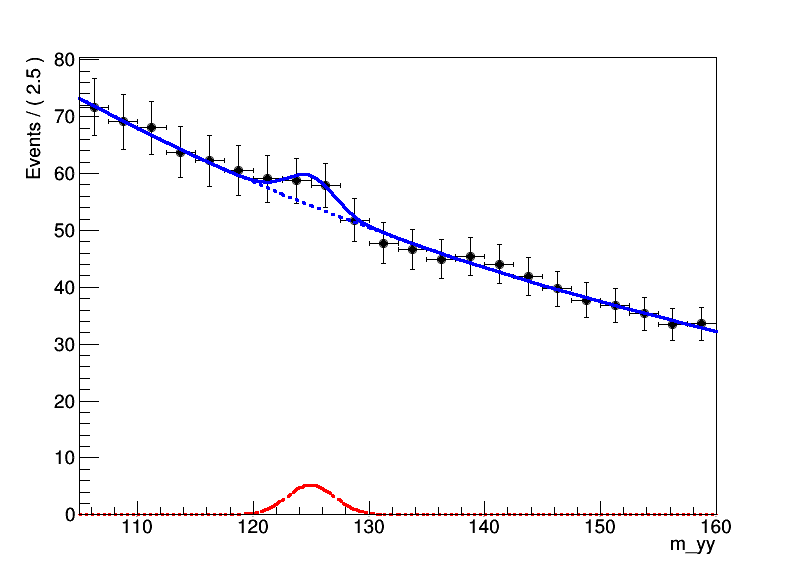

[#1] INFO:InputArguments -- RooAbsData::plotOn(0tag_bkg_nonHiggs) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors
[#1] INFO:Plotting -- RooAbsPdf::plotOn(constrained_model) directly selected PDF components: (bkg_fit_fixed)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(constrained_model) indirectly selected PDF components: (full_model)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(constrained_model) directly selected PDF components: (dscb_1h_fixed)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(constrained_model) indirectly selected PDF components: (full_model)


INFO:ROOT.TCanvas.Print] png file /var/folders/0d/3d7wlbr14zn3_l2ctx0r1jdw0000gn/T/tmpIxySJV.png has been created


In [31]:
frame = myy.frame()
combined_data.plotOn(frame)
#dh_bkg_noH.plotOn(frame)
#exp_function.plotOn(frame)
#dh_bkg_1H.plotOn(frame)
#dscb_1h.plotOn(frame)

constrained_model.plotOn(frame)
constrained_model.plotOn(frame, ROOT.RooFit.Components('bkg_fit_fixed'), ROOT.RooFit.LineStyle(ROOT.kDashed))
constrained_model.plotOn(frame, ROOT.RooFit.Components('dscb_1h_fixed'), ROOT.RooFit.LineStyle(ROOT.kDashed), ROOT.RooFit.LineColor(ROOT.kRed))


frame.Draw()
frame.SetTitle("")
c1.SetLogy(False)
c1

# Create Workspace and import everything

In [32]:
w = ROOT.RooWorkspace('w')

In [33]:
getattr(w,'import')(constrained_model)

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooProdPdf::constrained_model
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooAddPdf::full_model
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooExponential::bkg_fit_fixed
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::myy
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::c0_bkg_fixed
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::n_noh
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing HggTwoSidedCBPdf::dscb_1h_fixed
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::m0_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma_cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::alphaLo_cb_fixed
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::nLo_cb_fixed
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) 

In [34]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(alphaHi_cb_fixed,alphaLo_cb_fixed,c0_bkg_fixed,m0_cb,mu_2h_signal_strength,myy,nHi_cb_fixed,nLo_cb_fixed,n_1h,n_2h,n_noh,sigma_cb,theta,theta_global)

p.d.f.s
-------
RooExponential::bkg_fit_fixed[ x=myy c=c0_bkg_fixed ] = 0.139522
RooProdPdf::constrained_model[ full_model * theta_constraint ] = 0.138192
HggTwoSidedCBPdf::dscb_1h_fixed[ m=myy m0=m0_cb sigma=sigma_cb alphaLo=alphaLo_cb_fixed nLo=nLo_cb_fixed alphaHi=alphaHi_cb_fixed nHi=nHi_cb_fixed ] = 0.00601483
RooAddPdf::full_model[ n_noh * bkg_fit_fixed + n_1h_prod * dscb_1h_fixed + n_2h_times_mu * dscb_1h_fixed ] = 0.138204
RooGaussian::theta_constraint[ x=theta mean=theta_global sigma=1 ] = 0.99991

functions
--------
RooAddition::n_1h_coeff[ 1 + xxx ] = 0.995973
RooProduct::n_1h_prod[ n_1h * n_1h_coeff ] = 10.9557
RooProduct::n_2h_times_mu[ n_2h * mu_2h_signal_strength ] = 0.000273896
RooProduct::xxx[ 0.3 * theta ] = -0.0040266



In [35]:
import ROOT.RooStats as rs

In [36]:
mconfig = rs.ModelConfig(w) # can then be imported into the ws

In [37]:
mconfig.SetPdf(w.pdf("constrained_model"))
mconfig.SetParametersOfInterest(ROOT.RooArgSet(w.var("mu_2h_signal_strength")))
mconfig.SetObservables(ROOT.RooArgSet(w.var("myy")))#w.var("n_1h"), w.var("n_2h"), w.var("n_noh")))
mconfig.SetNuisanceParameters(ROOT.RooArgSet(w.var("theta")))

# can use ModelConfig::SetSnapshot(const RooArgSet &) 
#to define parameter values for the null in case of a common model (e.g. # = 0 for the B model)
mconfig.SetSnapshot(ROOT.RooArgSet(w.var("mu_2h_signal_strength"))) 
mconfig.SetGlobalObservables(ROOT.RooArgSet(w.var("theta_global")))

In [38]:
mconfig.Print()


=== Using the following for  ===
Observables:             RooArgSet:: = (myy)
Parameters of Interest:  RooArgSet:: = (mu_2h_signal_strength)
Nuisance Parameters:     RooArgSet:: = (theta)
Global Observables:      RooArgSet:: = (theta_global)
PDF:                     RooProdPdf::constrained_model[ full_model * theta_constraint ] = 0.138192
Snapshot:                
  1) 0x7fc97ea10680 RooRealVar:: mu_2h_signal_strength = 0.000273896 +/- 0.646766  L(0 - 5)  "double higgs signal strength"



# Profile Likelihood Calculator

In [39]:
pl = rs.ProfileLikelihoodCalculator(combined_data, mconfig)

In [40]:
pl.SetConfidenceLevel(0.683)

In [41]:
interval = pl.GetInterval()

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization --  Including the following contraint terms in minimization: (theta_constraint)
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoGLobalFit - find MLE 
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoMinimizeNLL - using Minuit / Migrad with strategy 1
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_constrained_model_0tag_bkg_nonHiggs_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (bkg_fit_fixed)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (dscb_1h_fixed)
[#1] INFO:Minization -- 
  RooFitResult: minimized FCN value: -65563, estimated distance to minimum: 9.32252e-07


I don't think this makes much sense. Apparently we should be using Toy MC or Asimov Dataset.

# Asimov Dataset

First find conditional MLE values for the nuisance parameters given a fixed value of the POI. Then use these values for the Asimov Dataset generation.

In [41]:
#RooAbsData * asimov = AsymptoticCalculator::MakeAsimovData(data, mc, RooArgSet(*w.var("a"),*w.var("b")), RooArgSet());

In [ ]:
# AsymptoticCalculator ac(*data, *bModel, *sbModel);
# HypoTestInverter calc(*ac);

In [39]:
w.var("mu_2h_signal_strength").setVal(2.5)
w.var("mu_2h_signal_strength").setConstant(True)
res = w.pdf("constrained_model").fitTo(combined_data, rf.Constrain(w.set('_NuisParams')), rf.Save(), rf.SumW2Error(ROOT.kTRUE))
w.set('_NuisParams').Print("v")
w.var("mu_2h_signal_strength").setConstant(False)

np_cmle = w.set('_NuisParams').snapshot() #conditional MLE values for mu=10

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization --  Including the following contraint terms in minimization: (theta_constraint)
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_constrained_model_0tag_bkg_nonHiggs_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (bkg_fit_fixed)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (dscb_1h_fixed)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24991e+02  5.40235e-01    1.05000e+02  1.60000e+02
     2 n_noh        1.09914e+03  2.06833e+01   

In [40]:
w.var("mu_2h_signal_strength").getVal()

2.5

In [41]:
mconfig.SetSnapshot(ROOT.RooArgSet(w.var("mu_2h_signal_strength"))) 

[#1] INFO:ObjectHandling -- RooWorkspace::saveSnaphot(w) replacing previous snapshot with name snapshot


In [42]:
asimov = rs.AsymptoticCalculator.MakeAsimovData(
    combined_data,
    mconfig,
    ROOT.RooArgSet(w.var("mu_2h_signal_strength")), # set of poi
    ROOT.RooArgSet(w.var("theta_global")) # set of global observables
)

MakeAsimov: Setting poi mu_2h_signal_strength to a constant value = 2.5
MakeAsimov: doing a conditional fit for finding best nuisance values 
 **********
 **   13 **SET PRINT           0
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24974e+02  5.45218e-01    1.05000e+02  1.60000e+02
     2 n_noh        1.09691e+03  1.80237e+01    0.00000e+00  3.00000e+03
     3 sigma_cb     2.12937e+00  6.70268e-01    0.00000e+00  2.00000e+03
     4 theta       -4.74587e-02  9.60887e-01   -1.00000e+01  1.00000e+01
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PRINT           0
 **********
 **********
 **   17 **SET STR           1
 **********
 **********
 **   18 **MIGRAD        2000           1
 **********
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.
 FCN=-2255.86 FROM MIGRAD    STATUS=CONVERGED      54 CALLS     

In [43]:
res = w.pdf("constrained_model").fitTo(
    asimov, rf.Constrain(w.set('_NuisParams')), rf.Save(), rf.SumW2Error(ROOT.kTRUE)
)
# to get the exact value for mu back, I think you need to set the values of all other nuisance params to the ones
# found above (CMLE)

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization --  Including the following contraint terms in minimization: (theta_constraint)
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_constrained_model_AsimovData_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (bkg_fit_fixed)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (dscb_1h_fixed)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 m0_cb        1.24974e+02  2.47434e+00    1.05000e+02  1.60000e+02
     2 mu_2h_signal_strength   2.50000e+00  6.46766e-0

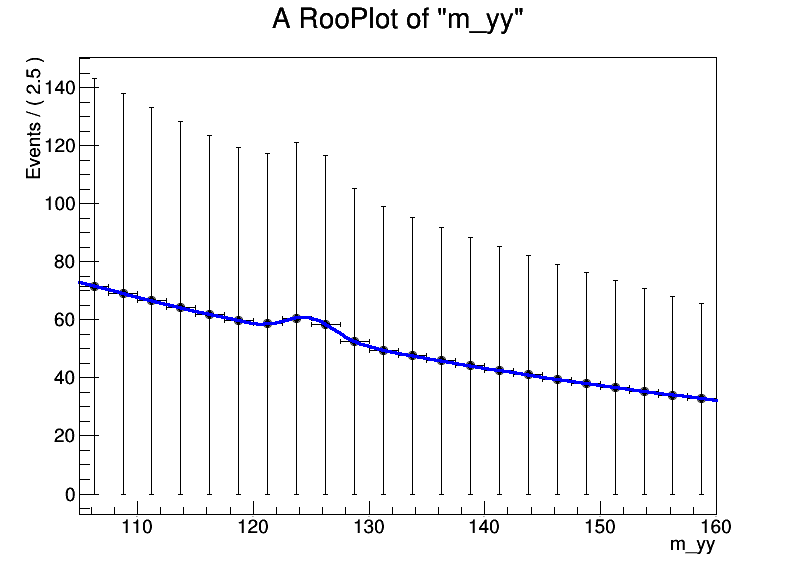

[#1] INFO:InputArguments -- RooAbsData::plotOn(AsimovData) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


INFO:ROOT.TCanvas.Print] png file /var/folders/0d/3d7wlbr14zn3_l2ctx0r1jdw0000gn/T/tmpcl6xVt.png has been created


In [44]:
frame = myy.frame()
asimov.plotOn(frame)
w.pdf("constrained_model").plotOn(frame)
frame.Draw()
c1

In [45]:
w.Print()


RooWorkspace(w) w contents

variables
---------
(alphaHi_cb_fixed,alphaLo_cb_fixed,c0_bkg_fixed,m0_cb,mu_2h_signal_strength,myy,nHi_cb_fixed,nLo_cb_fixed,n_1h,n_2h,n_noh,sigma_cb,theta,theta_global)

p.d.f.s
-------
RooExponential::bkg_fit_fixed[ x=myy c=c0_bkg_fixed ] = 0.206111/7.88921
RooProdPdf::constrained_model[ full_model * theta_constraint ] = 0.203626/1
HggTwoSidedCBPdf::dscb_1h_fixed[ m=myy m0=m0_cb sigma=sigma_cb alphaLo=alphaLo_cb_fixed nLo=nLo_cb_fixed alphaHi=alphaHi_cb_fixed nHi=nHi_cb_fixed ] = 0.000682233/5.23249
RooAddPdf::full_model[ n_noh * bkg_fit_fixed + n_1h_prod * dscb_1h_fixed + n_2h_times_mu * dscb_1h_fixed ] = 0.0258113/1
RooGaussian::theta_constraint[ x=theta mean=theta_global sigma=1 ] = 0.999999/2.50663

functions
--------
RooAddition::n_1h_coeff[ 1 + xxx ] = 0.999489
RooProduct::n_1h_prod[ n_1h * n_1h_coeff ] = 10.9944
RooProduct::n_2h_times_mu[ n_2h * mu_2h_signal_strength ] = 2.42961
RooProduct::xxx[ 0.3 * theta ] = -0.000510601

parameter snapshots
--

In [46]:
asimovNLL = w.pdf("constrained_model").createNLL(asimov, rf.Constrain(w.set("_NuisParams")))
asimovPLL = asimovNLL.createProfile(w.set('_POI'))

#sigma^2 = (mu-mu')^2/(2*asimovPLL)

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization --  Including the following contraint terms in minimization: (theta_constraint)


In [47]:
asimovPLL.getVal()

1.0641890185070224e-05

[#1] INFO:Minization -- RooProfileLL::evaluate(nll_constrained_model_AsimovData_with_constr_Profile[mu_2h_signal_strength]) Creating instance of MINUIT
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_constrained_model_AsimovData_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_constrained_model_AsimovData_with_constr_Profile[mu_2h_signal_strength]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_constrained_model_AsimovData_with_constr_Profile[mu_2h_signal_strength]) minimum found at (mu_2h_signal_strength=2.38323)
.